In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("customer_segmentation_data.csv")
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [3]:
df.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [6]:
df.dtypes

id                        int64
age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

In [7]:
#Checking for inconsistensies
# Check for inconsistencies
print(df['gender'].unique())
print(df['preferred_category'].unique())

['Female' 'Other' 'Male']
['Groceries' 'Sports' 'Clothing' 'Home & Garden' 'Electronics']


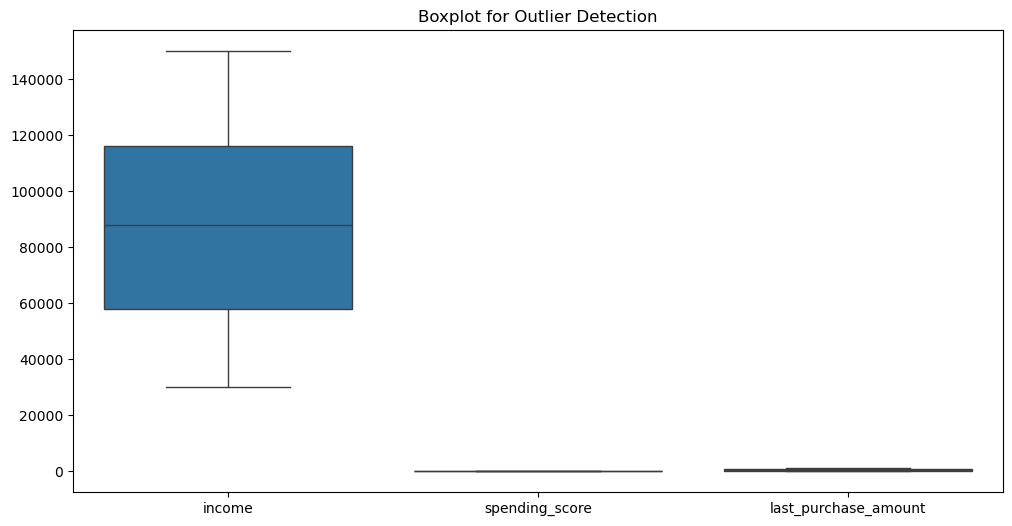

In [8]:
#Checking for outliers in the numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for income, spending_score, and last_purchase_amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['income', 'spending_score', 'last_purchase_amount']])
plt.title('Boxplot for Outlier Detection')
plt.show()


In [10]:
# Summary Statistics to Check Data Distribution
# Summary statistics
print(df.describe())


                id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500

## EDA

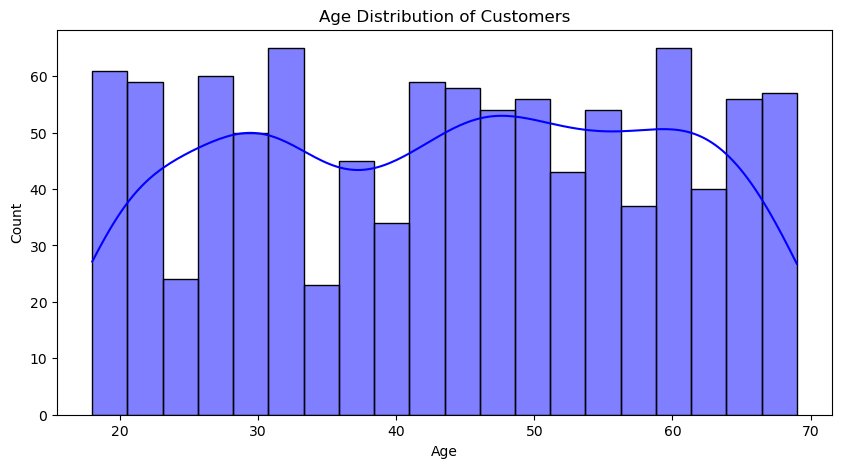

In [11]:
#Visualizing Customer Demographics
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Age Distribution of Customers

This histogram visualizes the distribution of customer ages.  
- **X-axis (Age):** Represents customer ages, ranging from approximately 18 to 70.  
- **Y-axis (Count):** Shows the number of customers within each age group.  
- **Histogram Bars:** Display the frequency of different age groups.  
- **KDE Line (Smooth Curve):** Provides a smoothed estimate of the age distribution.  

Key Observations:  
- The distribution appears somewhat bimodal, with peaks around the **mid-20s to 30s and 50s to 60s**.  
- Certain age groups have a higher customer count than others, indicating possible market segments.  

This analysis helps in understanding customer demographics for better decision-making.


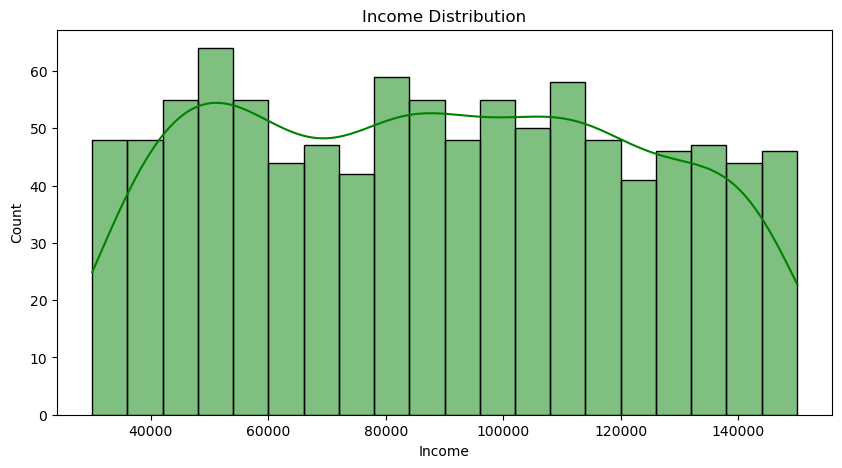

In [12]:
#Income Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['income'], bins=20, kde=True, color="green")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

### Income Distribution
#### **Key Observations:**  
- **Even Distribution with Some Peaks** – The income levels are spread out fairly evenly, but **there are noticeable concentrations** around **$50,000, $80,000, and $110,000**.  
- **No Strong Skewness** – The income distribution does not lean heavily toward lower or higher incomes, indicating a **broad range of customer income levels**.  
- **KDE Line Highlights Key Income Groups** – The smooth green line helps identify the most common income brackets, providing a clearer picture of customer segments.  

#### **Solution-Oriented Insights:**  
Understanding this income distribution can help businesses:  
1. **Segment Customers Effectively** – Knowing where most customers fall in terms of income allows for better market segmentation.  
2. **Targeted Pricing & Promotions** – Different income groups may respond differently to product pricing and discounts.  
3. **Product Positioning** – Helps in designing products/services that align with the spending capabilities of different customer groups.  

This analysis provides a **data-driven foundation** for businesses to make strategic marketing and sales decisions, ensuring products and services align with their customers’ financial profiles.


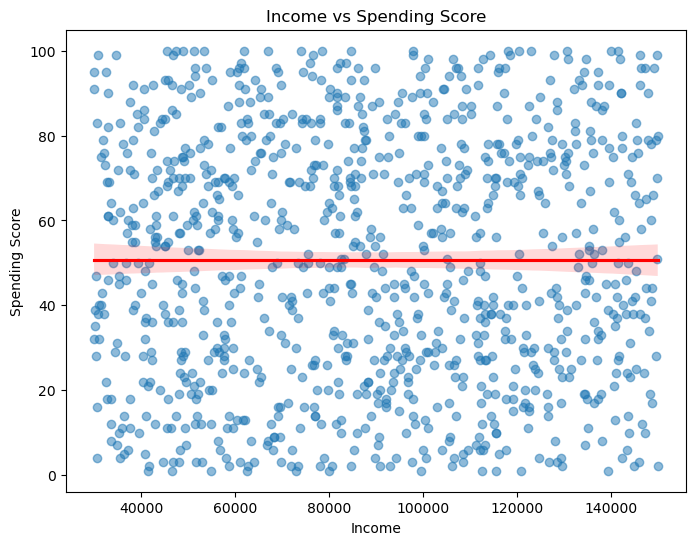

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x=df['income'], y=df['spending_score'], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Income vs Spending Score")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

### Income vs Spending Score Scatter Plot

The plot shows the relationship between Income and Spending Score.

The red regression line is overlaid on the scatter plot, indicating the trend in the data. The line appears relatively flat, suggesting a weak or no clear correlation between income and spending score.


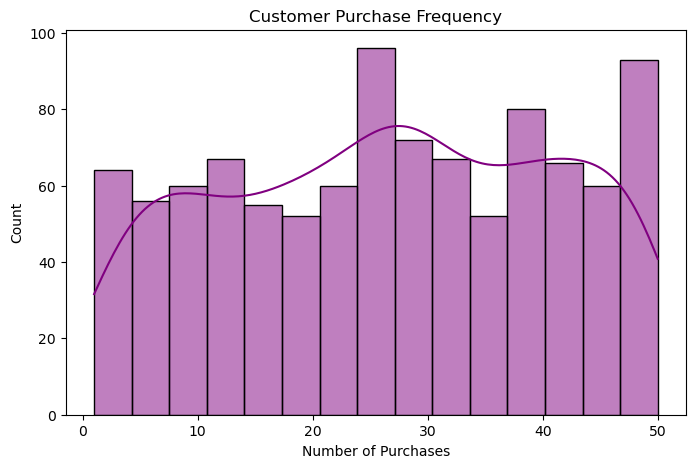

In [15]:
# Shopping Behavior Analysis
#Purchase Frequency Trends
plt.figure(figsize=(8,5))
sns.histplot(df['purchase_frequency'], bins=15, kde=True, color="purple")
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Count")
plt.show()


The distribution is somewhat varied, with peaks around low and high purchase counts, suggesting that some customers purchase very frequently while others purchase less often. The presence of peaks at different points suggests that customers might be divided into low-frequency and high-frequency buyers, which could be useful for marketing and targeted promotions.

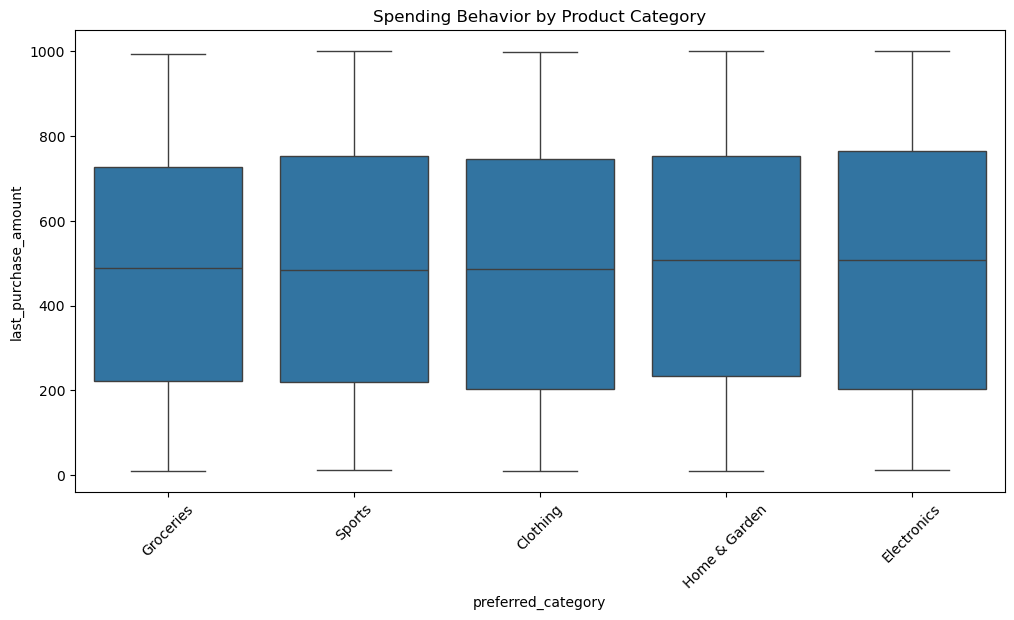

In [16]:
#Spending by Preferred Category
plt.figure(figsize=(12,6))
sns.boxplot(x='preferred_category', y='last_purchase_amount', data=df)
plt.xticks(rotation=45)
plt.title("Spending Behavior by Product Category")
plt.show()


#### **Key Observations:**  
- **Similar Spending Patterns Across Categories** – Median spending (~$450-$500) is consistent across all product types.  
- **High Variability in Purchase Amounts** – Some customers make small purchases, while others spend significantly more.  
- **No Extreme Outliers** – Spending distribution is well-balanced across all categories.  

#### **Conclusion & Business Insights:**  
- **Focus on Customer Segments** – Since spending behavior is not category-dependent, businesses should segment customers based on spending habits.  
- **Personalized Pricing & Offers** – Implement loyalty programs, targeted discounts, and upselling strategies to maximize revenue.  
- **Encourage Higher Spending** – Use bundling and promotions to increase purchase value.  

This analysis highlights the need for **customer-driven pricing and marketing strategies** rather than product-based assumptions.

In [17]:
#Feature Engineering
df['loyalty_score'] = df['membership_years'] * df['purchase_frequency']


In [18]:
# Creating Age Categories
def categorize_age(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 50:
        return "Middle-aged"
    else:
        return "Senior"

df['age_group'] = df['age'].apply(categorize_age)


In [20]:
#Encoding categorical feautres
from sklearn.preprocessing import LabelEncoder

# Encode age groups
encoder = LabelEncoder()
df['age_group_encoded'] = encoder.fit_transform(df['age_group'])


# Clustering ( Customer Segmentation)

In [21]:
# Prepare Data for Clustering
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for clustering
features = ['income', 'spending_score', 'loyalty_score', 'age_group_encoded']
X = df[features].copy()

# Scaling the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


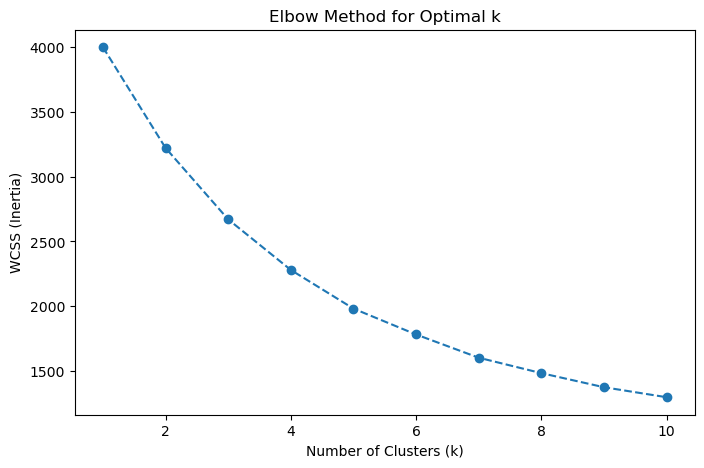

In [22]:
# finding the optimal number of clusters using elbow method
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

### Findings & Next Steps  
From the graph, we observe a sharp decline in WCSS at lower values of k, followed by a noticeable slowdown in improvement. This **"elbow point" appears around k = 3 or 4**, indicating that increasing the number of clusters beyond this provides diminishing returns.  

#### What This Means  
This finding suggests that **3 or 4 clusters** effectively balance compactness and efficiency, making them ideal choices for segmentation. Selecting too few clusters may oversimplify the patterns in the data, while too many could introduce unnecessary complexity.  

#### Next Steps  
With this insight, the next step is to **validate the clustering results** by:  
- **Interpreting the clusters** to see if they make logical sense.  
- **Evaluating cluster quality** using silhouette scores or other validation metrics.  
- **Applying the model to real-world scenarios**, such as customer segmentation or anomaly detection.  

By leveraging these clusters, we can extract meaningful insights that drive decisions.  


In [23]:
#Apply K-Means Clustering
# Setting optimal k from the Elbow Method (e.g., if k=4)
optimal_k = 4  # Change this based on your Elbow result

# Running K-Means on scaled data
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Checking the first few rows
df[['income', 'spending_score', 'loyalty_score', 'age_group_encoded', 'cluster']].head()


,income,spending_score,loyalty_score,age_group_encoded,cluster
0,99342,90,72,0,1
1,78852,60,84,2,2
2,126573,30,56,1,2
3,47099,74,45,0,1
4,140621,21,75,1,2


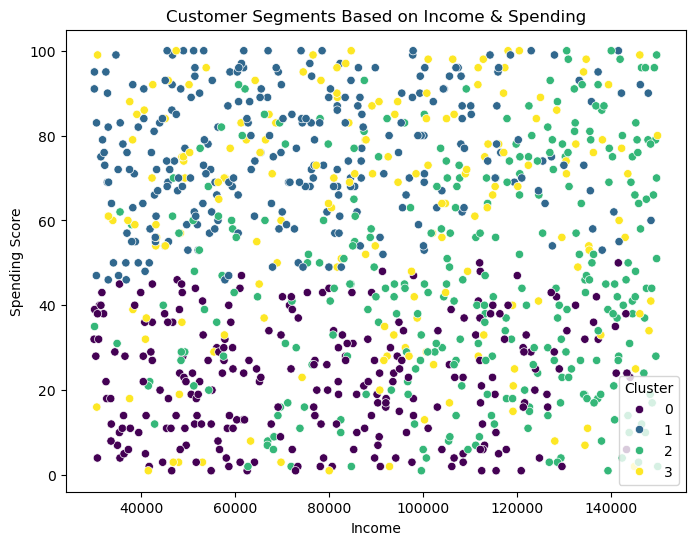

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['income'], y=df['spending_score'], hue=df['cluster'], palette='viridis')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments Based on Income & Spending")
plt.legend(title="Cluster")
plt.show()

### Customer Segments Based on Income & Spending  

This scatter plot represents the **customer segmentation** based on **income** and **spending score** using K-means clustering. Each point represents an individual customer, categorized into **four distinct clusters (0-3)**.  

#### **Key Observations:**  
- The x-axis represents **Income**, ranging from approximately **$30,000 to $150,000**.  
- The y-axis represents **Spending Score**, which indicates customer spending behavior on a scale of **0 to 100**.  
- Different colors represent different clusters, as shown in the legend.  

#### **Cluster Insights:**  
1. **High Income - High Spending (Top-right region, Blue cluster)**  
   - These customers have **strong purchasing power** and a **high spending tendency**.  
   - Likely represents **premium buyers or loyal customers**.  

2. **High Income - Low Spending (Bottom-right region, Purple cluster)**  
   - These individuals have **substantial income but limited spending**, possibly due to **budget-conscious behavior** or **different spending priorities**.  

3. **Low Income - High Spending (Top-left region, Yellow cluster)**  
   - Despite **lower income levels**, these customers have **high spending scores**.  
   - Could include **younger consumers, brand-loyal buyers, or impulse shoppers**.  

4. **Low Income - Low Spending (Bottom-left region, Green cluster)**  
   - These customers exhibit **both low income and low spending**, likely representing **cost-sensitive or infrequent shoppers**.  

#### **Business Implications:**  
Understanding these clusters helps businesses tailor their strategies:  
- **Target high-income, high-spending customers** with exclusive offers.  
- **Engage low-income, high-spending shoppers** with personalized promotions.  
- **Convert high-income, low-spending customers** through premium product incentives.  
  

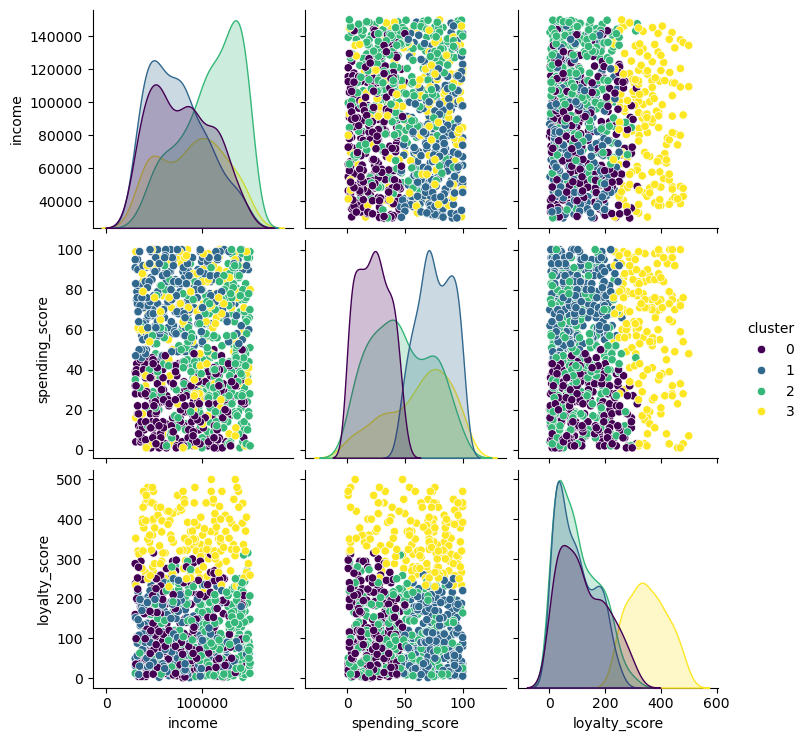

In [25]:
sns.pairplot(df[['income', 'spending_score', 'loyalty_score', 'cluster']], hue="cluster", palette="viridis")
plt.show()


### Multi-Dimensional Customer Segmentation Analysis  

This **pair plot** visualizes customer segmentation based on **income, spending score, and loyalty score**, with **four distinct clusters (0-3)** identified through K-means clustering. The combination of scatter plots and density distributions provides a **comprehensive view of relationships between features and cluster distributions**.  

#### **Key Observations:**  

1. **Income Distribution (First Column)**
   - Different clusters exhibit varying income levels.  
   - The **green cluster (Cluster 2)** represents higher-income individuals, while **purple (Cluster 0) and blue (Cluster 1) clusters** dominate the mid-to-lower income ranges.  

2. **Spending Score vs. Income (Middle Row, First Column)**
   - Spending behavior is **highly dispersed across income levels**, indicating that income alone does not dictate spending habits.  
   - The **purple cluster (Cluster 0) has lower spending scores**, while **blue and green clusters (Clusters 1 & 2) are more active spenders**.  

3. **Loyalty Score Insights (Bottom Row)**
   - The **yellow cluster (Cluster 3) has exceptionally high loyalty scores**, suggesting a group of extremely engaged customers.  
   - Other clusters display varying loyalty, with **Clusters 0, 1, and 2 being more evenly distributed**.  

#### **Business Implications:**  
- **Targeting Strategies**:  
  - High-income, low-spending customers (**Cluster 2**) could be encouraged with exclusive offers.  
  - High-loyalty customers (**Cluster 3**) can be leveraged for brand advocacy and premium memberships.  
  - Low-spending, low-loyalty groups (**Cluster 0**) may require engagement strategies such as discounts or rewards.  

- **Personalized Marketing**:  
  - Understanding these segments helps in crafting data-driven marketing strategies that align with customer behavior and engagement levels.  

This segmentation approach provides a **strategic foundation for optimizing customer engagement, retention, and profitability**.  


##  Analyzing & Interpreting Customer Segments

In [26]:
#Cluster Distribution
df['cluster'].value_counts()


cluster
2    304
1    266
0    254
3    176
Name: count, dtype: int64

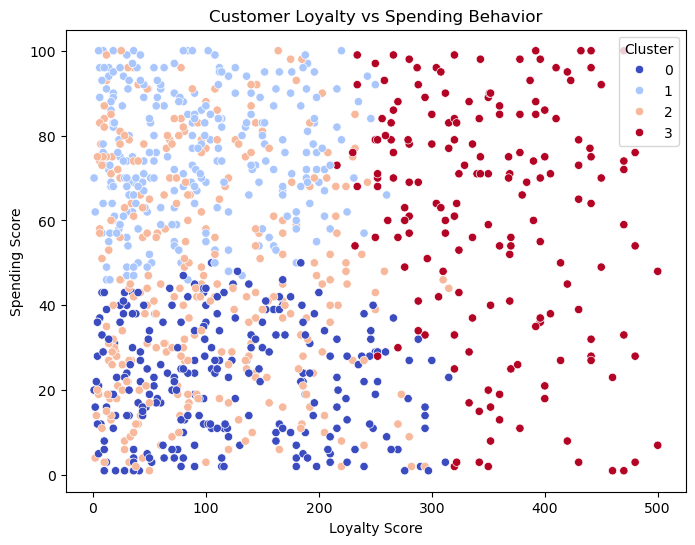

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['loyalty_score'], y=df['spending_score'], hue=df['cluster'], palette='coolwarm')
plt.xlabel("Loyalty Score")
plt.ylabel("Spending Score")
plt.title("Customer Loyalty vs Spending Behavior")
plt.legend(title="Cluster")
plt.show()


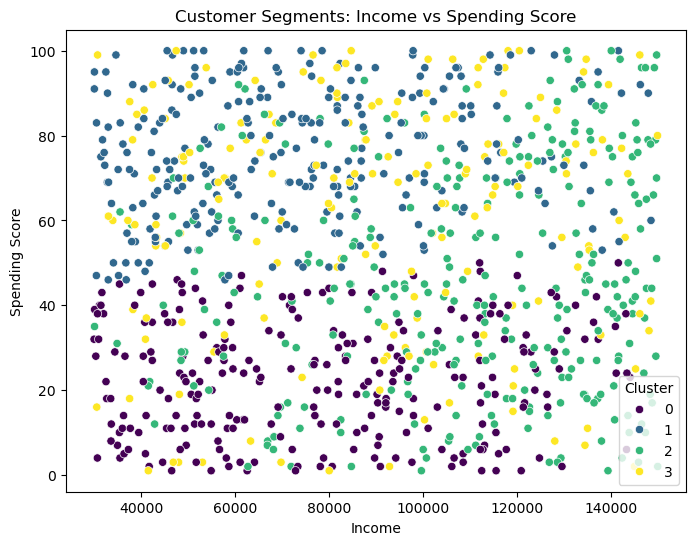

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['income'], y=df['spending_score'], hue=df['cluster'], palette='viridis')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments: Income vs Spending Score")
plt.legend(title="Cluster")
plt.show()


#### Key Insights
Winning Segment (Cluster 2: 304 customers)
These customers are highly loyal and spend heavily. They’re your brand advocates.
Action: Reward them (e.g., early access to sales, tiered loyalty benefits).

At-Risk Segment (Cluster 3: 176 customers)
They spend a lot but aren’t loyal. Could be deal-seekers or one-time buyers.
Action: Investigate why loyalty is low (e.g., poor customer service? Lack of engagement?).

Low-Value Segment (Cluster 0: 254 customers)
Minimal engagement and spending. May not be worth heavy investment.
Action: Test low-cost re-engagement campaigns (e.g., discounts for first purchase).

Middle Ground (Cluster 1: 266 customers)
Steady but not exceptional. Potential to move them to Cluster 2.
Action: Encourage repeat purchases (e.g., "Buy 5, get 1 free" programs).

In [31]:
df.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount',
       'loyalty_score', 'age_group', 'age_group_encoded', 'cluster'],
      dtype='object')

In [33]:
# Save the DataFrame as a CSV file in the current directory
df.to_csv("customer_segments_with_clusters.csv", index=False)

print("File saved successfully in the current working directory!")


File saved successfully in the current working directory!
